<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring2024/blob/main/Module%201/3_NumericalIntegration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

January 21, 2024

This notebook was adapted from notebooks by Prof. Volodymir Vovchenko as a part of his course Computational Physics course (PHYS 6350), available on GitHub as https://github.com/vlvovch/PHYS6350-ComputationalPhysics

# Numerical integration

Consider a generic problem of integrating a function over some interval:
$$
I = \int_{a}^b f(x) \, dx
$$

We may need to resort to numerical integration when:
- we have no explicit expression for $f(x)$ but only know its values at certain points
- we do not know how to evaluate the antiderivative of $f(x)$ even if we know $f(x)$ itself

There are two main types of numerical integration methods:
- direct evaluation of the integral over the interval (a,b)
- composite methods where the integration interval is separated into sub-intervals

The most common methods are:

- Rectangle rule (seldom used)
- Trapezoidal rule
- Simpson method
- Quadratures (Newton-Cotes, Gaussian)


Adaptive quadratures: choose subintervals to control the error

# Rectangle rule

Approximate the integral by an area of a rectangle:

$$
\int_{a}^b f(x) \, dx \approx (b - a) \, f\left(\frac{a+b}{2}\right)
$$

To improve the accuracy, separate the integration interval into $N$ subintervals of length $h = (b-a)/N$ and apply the rectangle rule to each of them
$$
\int_a^b f(x) \approx h \sum_{k=1}^N f(x_k), \qquad k = 1,\ldots, N
$$
with
$$
x_k = a + \frac{2k-1}{2} h~.
$$

In [ ]:
# Rectangle rule for numerical integration
# of function f(x) over (a,b) using n subintervals
def rectangle_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a + h / 2.
    for k in range(n):
        ret += f(xk) * h
        xk += h
    return ret

In [ ]:
# Visualize
def rectangle_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')

    labelrec = "rectangle rule, (N = " + str(n) + ")"

    xks = []
    fks = []
    h = (b - a) / n
    xk = a + h / 2.
    for k in range(1,n+1):
        fval = f(xk)
        if (k == 1):
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.],
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h/2., xk - h/2., xk + h/2., xk + h/2.,xk - h/2.], [0.,fval,fval,0.,0.],
                     color = 'blue')

        xks.append(xk)
        fks.append(fval)

        xk += h

    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()

    return plt

Consider a function $f(x) = x^4 - 2x + 2$ and its integral over $(0,2)$:
$$
\int_0^2 ( x^4 - 2x + 2) dx = \left. \frac{x^5}{5} - x^2 + 2x \right|_0^2 = 6.4
$$

In [ ]:
# The function example we will use
# Overwrite as applicable

flabel = 'x^4 - 2x + 2'
def f(x):
    return x**4 - 2*x + 2
flimit_a = 0.
flimit_b = 2.

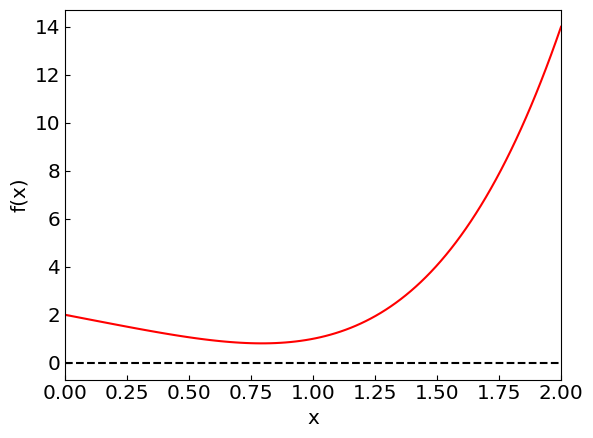

In [ ]:
# Preliminaries: import numpy, matplotlib and set default styles
import numpy as np
import matplotlib.pyplot as plt

# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

numpoints = 100
xplot = np.linspace(0,2,numpoints)

yplot = f(xplot)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0,2)
plt.axhline(y = 0., color = 'black', linestyle = '--')
plt.plot(xplot,yplot, color = 'red')
plt.show()

Let us evaluate the performance of numerical integration

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using rectangle rule
N = 1 , I =  2.0
N = 2 , I =  5.125
N = 3 , I =  5.818930041152262
N = 4 , I =  6.0703125
N = 5 , I =  6.188159999999999
N = 6 , I =  6.252572016460903
N = 7 , I =  6.291545189504369
N = 8 , I =  6.31689453125
N = 9 , I =  6.334298633338417
N = 10 , I =  6.346759999999996
N = 11 , I =  6.355986612936278
N = 12 , I =  6.363007973251031
N = 13 , I =  6.368474493190009
N = 14 , I =  6.37281341107871
N = 15 , I =  6.376314732510287
N = 16 , I =  6.379180908203125
N = 17 , I =  6.381556734234506
N = 18 , I =  6.383547985571311
N = 19 , I =  6.385233385256395
N = 20 , I =  6.386672500000006
N = 21 , I =  6.387911072718333
N = 22 , I =  6.388984700498595
N = 23 , I =  6.3899214196633
N = 24 , I =  6.3907435538837385
N = 25 , I =  6.391469056000005
N = 26 , I =  6.392112496061053
N = 27 , I =  6.392685798298071
N = 28 , I =  6.393198797376085
N = 29 , I =  6.393659662849694
N = 30 , I =  6.3940752263374

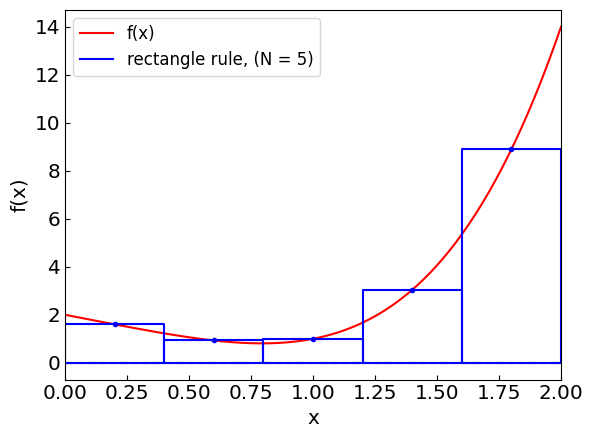

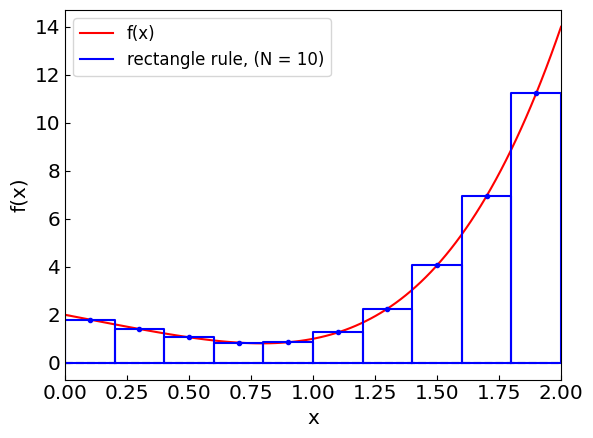

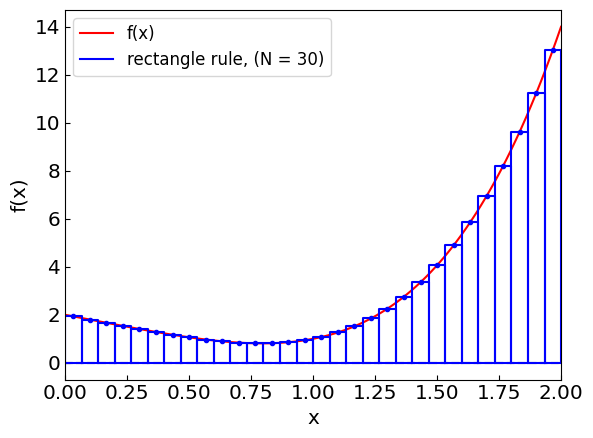

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using rectangle rule")
for n in range(1,31):
    print("N =",n,", I = ",rectangle_rule(f,a,b,n))

rectangle_rule_plot(f,a,b,5).show()
rectangle_rule_plot(f,a,b,10).show()
rectangle_rule_plot(f,a,b,30).show()

In [ ]:
# Animate

import os
import matplotlib.animation as animation
import imageio

def integrate_animate(f, flabel, a, b, rule, rule_plot, filename = 'rectangle.gif', nstart = 1, iterations = 8):
    labelgif = filename

    filenames = []
    n = nstart
    for ind in range(1,iterations):
        # create file name and append it to a list
        filename = f'{ind}.png'
        filenames.append(filename)

        plot = rule_plot(f,a,b,n)
        val = rule(f,a,b,n)
        plot.title('I = ' + str(val))
        plot.savefig(filename)
        plot.close()

        n *= 2

    # build gif
    with imageio.get_writer(labelgif, mode='I', duration=2) as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)

In [ ]:
integrate_animate(f,flabel,flimit_a,flimit_b,rectangle_rule,rectangle_rule_plot,'rectangle_rule.gif', 1, 8)

<ipython-input-6-35e945404b69>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Look at the created animated files

The error for a rectangle rule can be shown to be equal to (using the Taylor theorem):
$$
\int_a^b f(x) dx -  (b - a) \, f\left(\frac{a+b}{2}\right) \approx \frac{(b-a)^3}{24} f''(a)
$$
to leading order in $(b-a)$.

For the composite rectangle rule, we have this rule for each subinterval $h = (b-a) / N$ and we have to sum up the errors from each interval. We have
$$
I - I_{\rm rect} = (b-a) \frac{h^2}{24} \, f''(a) + \mathcal{O}(h^4).
$$

The rectangle rule is exact for the integration of linear functions ($f'' = 0$ and all higher-order derivatives).

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


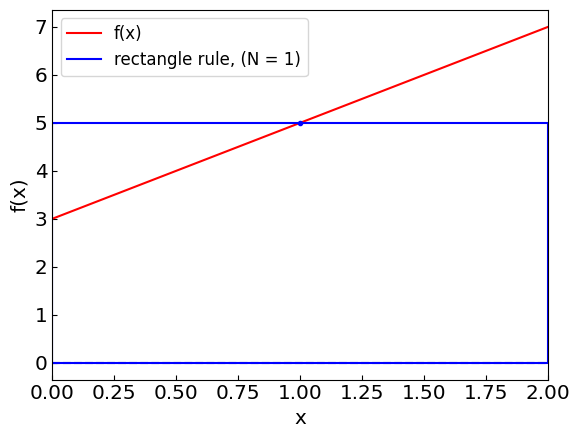

In [ ]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",rectangle_rule(flinear,a,b,n))

rectangle_rule_plot(flinear,a,b,1).show()

# Trapezoidal rule

Approximate the integral by an area of a trapezoid.
This is achieved by linear interpolation of the function between (sub)interval endpoints:

$$
\int_{a}^b f(x) \, dx \approx (b-a) \, \frac{f(a) + f(b)}{2}~.
$$

As for rectangle rule, to improve the accuracy, separate the integration interval into $N$ subintervals of length $h = (b-a)/N$ and apply the trapezoidal rule to each of them
$$
\int_a^b f(x) \approx h \sum_{k=0}^N \frac{f(x_k) + f(x_{k+1})}{2}, \qquad i = 0,\ldots, N
$$
with
$$
x_k = a +  k h~.
$$

In [ ]:
# Trapezoidal rule for numerical integration
# of function f(x) over (a,b) using n subintervals
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    ret = 0.0
    xk = a
    fk = f(xk)
    for k in range(n):
        xk += h
        fk1 = f(xk)
        ret += h * (fk + fk1) / 2.
        fk = fk1
    return ret

In [ ]:
# Visualize
def trapezoidal_rule_plot(f, a, b, n, numpoints = 100):
    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')

    labelrec = "trapezoidal rule, (N = " + str(n) + ")"

    xks = []
    fks = []
    h = (b - a) / n
    xk = a
    fk = f(xk)
    for k in range(1,n+1):
        xk += h
        fk1 = f(xk)
        if (k == 1):
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.],
                     color = 'blue', label=labelrec)
        else:
            plt.plot([xk - h, xk - h, xk, xk,xk - h], [0.,fk,fk1,0.,0.],
                     color = 'blue')

        xks.append(xk)
        fks.append(fk1)

        fk = fk1

    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()

    return plt

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using trapezoidal rule
N = 1 , I =  16.0
N = 2 , I =  9.0
N = 3 , I =  7.572016460905349
N = 4 , I =  7.0625
N = 5 , I =  6.824960000000001
N = 6 , I =  6.695473251028805
N = 7 , I =  6.61724281549354
N = 8 , I =  6.56640625
N = 9 , I =  6.531524665955397
N = 10 , I =  6.506559999999999
N = 11 , I =  6.488081415203885
N = 12 , I =  6.474022633744856
N = 13 , I =  6.463079023843701
N = 14 , I =  6.454394002498951
N = 15 , I =  6.447386337448559
N = 16 , I =  6.441650390625
N = 17 , I =  6.4368961099603705
N = 18 , I =  6.432911649646909
N = 19 , I =  6.429539368175497
N = 20 , I =  6.426660000000005
N = 21 , I =  6.424181968075723
N = 22 , I =  6.422034014070073
N = 23 , I =  6.420160019439603
N = 24 , I =  6.418515303497934
N = 25 , I =  6.417063936000004
N = 26 , I =  6.41577675851685
N = 27 , I =  6.4146299087449545
N = 28 , I =  6.41360370678883
N = 29 , I =  6.412681805392758
N = 30 , I =  6.411850534979421


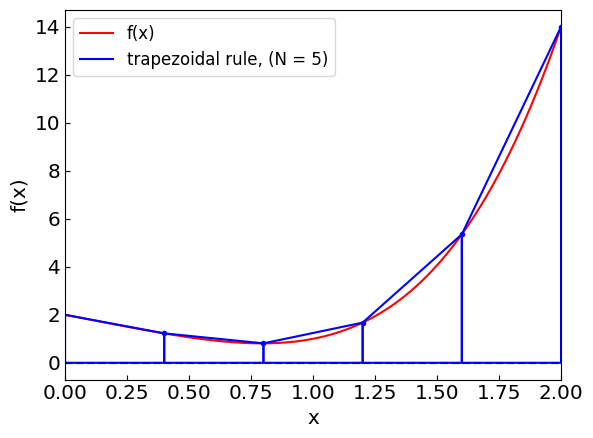

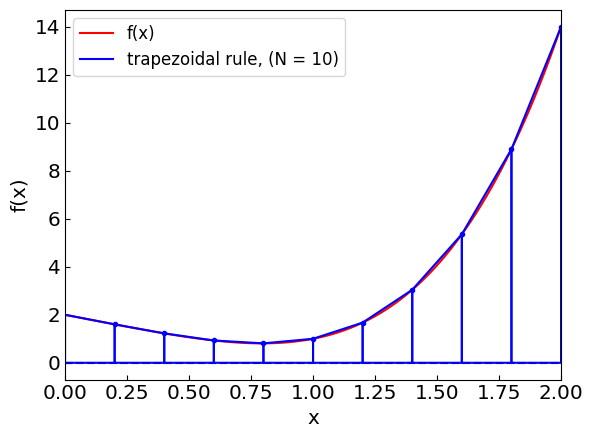

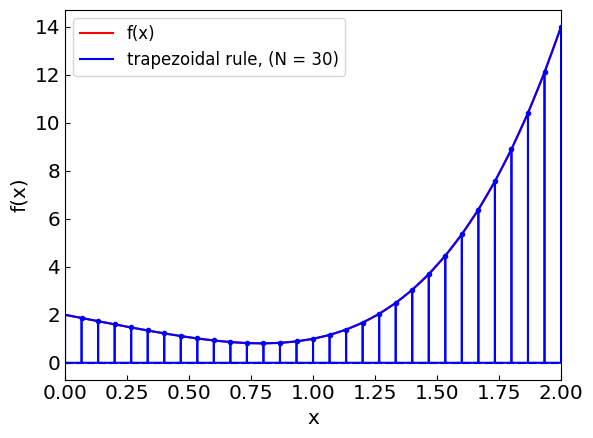

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using trapezoidal rule")
for n in range(1,31):
    print("N =",n,", I = ",trapezoidal_rule(f,a,b,n))

trapezoidal_rule_plot(f,a,b,5).show()
trapezoidal_rule_plot(f,a,b,10).show()
trapezoidal_rule_plot(f,a,b,30).show()

In [ ]:
integrate_animate(f,flabel,flimit_a,flimit_b,trapezoidal_rule,trapezoidal_rule_plot,'trapezoidal_rule.gif', 1, 8)

<ipython-input-6-35e945404b69>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


The error for the trapezoidal rule can be shown to be equal to (using the Taylor theorem):
$$
I - I_{\rm trap} = \int_a^b f(x) dx ~~ - ~~ (b-a) \, \frac{f(a) + f(b)}{2} \approx -\frac{(b-a)^3}{12} f''(a)
$$
to leading order in $(b-a)$.

For the composite trapezoidal rule we have:
$$
I - I_{\rm trap} = -(b-a) \frac{h^2}{12} \, f''(a) + \mathcal{O}(h^4).
$$

Just like the rectangle rule, the trapezoidal rule is exact for the integration of linear functions ($f'' = 0$ and all higher-order derivatives).

N = 1 , I =  10.0
N = 2 , I =  10.0
N = 3 , I =  9.999999999999998
N = 4 , I =  10.0
N = 5 , I =  10.0


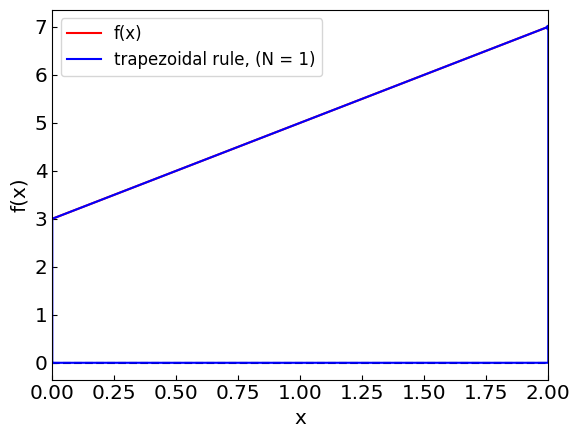

In [ ]:
flabellinear = 'f(x) = 2*x + 3'
def flinear(x):
    return 2. * x + 3.

a = 0.
b = 2.
for n in range(1,6):
    print("N =",n,", I = ",trapezoidal_rule(flinear,a,b,n))

trapezoidal_rule_plot(flinear,a,b,1).show()

# Simpson's rule

Recall the error estimate for rectangle and trapezoidal rules:
$$
I - I_{\rm rect} = \frac{(b-a)^3}{24} f''(a) + \mathcal{O}(h^4)
$$
and
$$
I - I_{\rm trap} = -\frac{(b-a)^3}{12} f''(a) + \mathcal{O}(h^4).
$$

Simpson's rule is a combination rectangle and trapezoidal rules:

$$
I_S = \frac{2I_{\rm rect} + I_{\rm trap}}{3}.
$$

This combination is chosen such that $O[(b-a)^3]$ error term vanishes.
Another way to derive Simpson's rule is to interpolate the integrand by a quadratic polynomial through the endpoints and the midpoint.

Simpson's rule reads
$$
\int_{a}^b f(x) \, dx \approx \frac{(b-a)}{6} \, \left[f(a) + 4 f \left( \frac{a+b}{2} \right) + f(b)\right].
$$

In the composite Simpson's rule one splits the integration interval into an even number $N$ of subintervals.
With $h = (b-a)/N$ one has
$$
\int_a^b f(x) \approx \frac{h}{3} \left[f(x_0) + 4 \sum_{k=1}^{N/2} f(x_{2k-1}) + 2 \sum_{k=1}^{N/2-1} f(x_{2k}) + f(x_N) \right] , \qquad i = 0,\ldots, N
$$
with
$$
x_k = a +  k h~.
$$

In [ ]:
# Simpson's rule for numerical integration
# of function f(x) over (a,b) using n subintervals
def simpson_rule(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    h = (b - a) / n
    ret = f(a) + f(b)
    for k in range(1, n, 2):
        xk = a + k * h
        ret += 4 * f(xk)
    for k in range(2, n-1, 2):
        xk = a + k * h
        ret += 2 * f(xk)
    ret *= h / 3.0
    return ret

In [ ]:
# Visualize
def simpson_rule_plot(f, a, b, n, numpoints = 100):
    tn = n
    if (tn == 1):
        tn = 2
    if tn % 2 == 1:
        raise ValueError("Number of subintervals must be even for Simpson's rule.")

    xplot = np.linspace(0,2,numpoints)
    yplot = f(xplot)

    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,2)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    plt.plot(xplot,yplot, color = 'red',label='f(x)')

    def PolySimpson(x,a,b,m,fa,fb,fm):
        ret = 0.
        ret += fa * (x - m) * (x - b) / (a - m) / (a - b)
        ret += fm * (x - a) * (x - b) / (m - a) / (m - b)
        ret += fb * (x - a) * (x - m) / (b - a) / (b - m)
        return ret

    labelrec = "Simpson's rule, (N = " + str(n) + ")"

    xks = []
    fks = []
    h = (b - a) / tn
    for k in range(1,tn,2):
        x1 = a + h * (k-1)
        x2 = a + h * k
        x3 = a + h * (k+1)
        f1 = f(x1)
        f2 = f(x2)
        f3 = f(x3)

        xks.append([x1,x2,x3])
        fks.append([f1,f2,f3])

        numpointssubplot = 50
        xsubplot = np.linspace(x1,x3,numpointssubplot)
        ysubplot = PolySimpson(xsubplot, x1, x3, x2, f1, f3, f2)

        if (k == 1):
            plt.plot(xsubplot, ysubplot,
                     color = 'blue', label=labelrec)
        else:
            plt.plot(xsubplot, ysubplot,
                     color = 'blue')

    plt.plot(xks,fks,'.', color = 'blue')
    plt.legend()

    return plt

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Simpson's rule
N = 2 , I =  6.666666666666666
N = 4 , I =  6.416666666666666
N = 6 , I =  6.403292181069957
N = 8 , I =  6.401041666666666
N = 10 , I =  6.400426666666667
N = 12 , I =  6.4002057613168715
N = 14 , I =  6.400111064834095


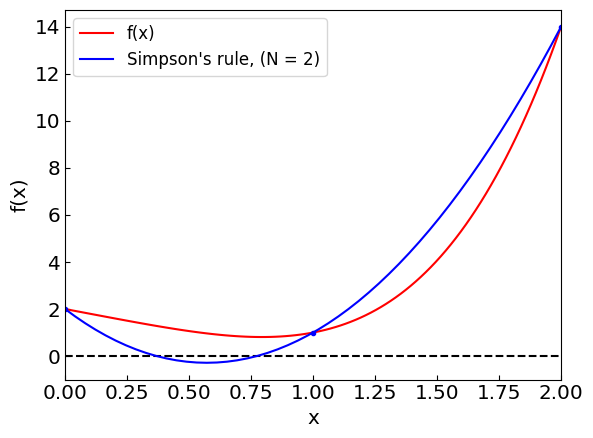

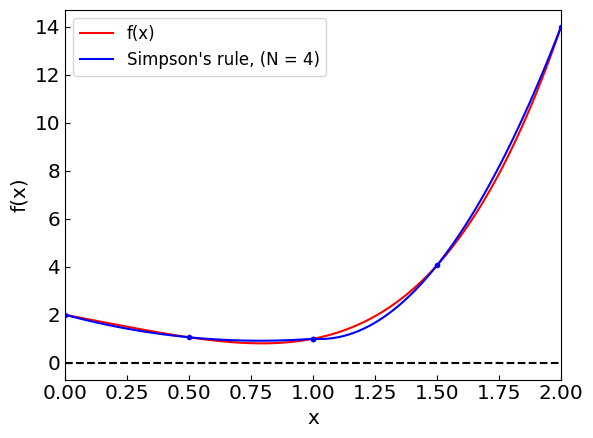

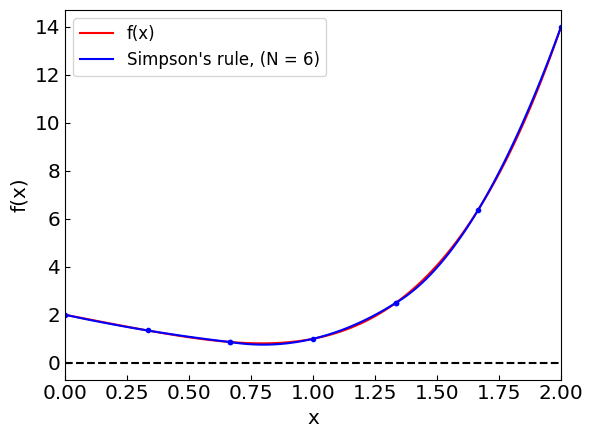

In [ ]:
a = 0.
b = 2.
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using Simpson's rule")
for n in range(2,15,2):
    print("N =",n,", I = ",simpson_rule(f,a,b,n))

simpson_rule_plot(f,a,b,2).show()
simpson_rule_plot(f,a,b,4).show()
simpson_rule_plot(f,a,b,6).show()

In [ ]:
integrate_animate(f,flabel,flimit_a,flimit_b,simpson_rule,simpson_rule_plot,'simpson_rule.gif', 2, 8)

<ipython-input-6-35e945404b69>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using Simpson's rule")
print("{0:>5} {1:>20} {2:>20} {3:>20}".format("N", "rectangle", "trapezoidal", "Simpson"))
for n in range(2,21,2):
    print("{0:5} {1:20.15f} {2:20.15f} {3:20.15f}".format(n, rectangle_rule(f,a,b,n),
                                                          trapezoidal_rule(f,a,b,n),
                                                          simpson_rule(f,a,b,n)))

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Simpson's rule
    N            rectangle          trapezoidal              Simpson
    2    5.125000000000000    9.000000000000000    6.666666666666666
    4    6.070312500000000    7.062500000000000    6.416666666666666
    6    6.252572016460903    6.695473251028805    6.403292181069957
    8    6.316894531250000    6.566406250000000    6.401041666666666
   10    6.346759999999996    6.506559999999999    6.400426666666667
   12    6.363007973251031    6.474022633744856    6.400205761316871
   14    6.372813411078710    6.454394002498951    6.400111064834095
   16    6.379180908203125    6.441650390625000    6.400065104166666
   18    6.383547985571311    6.432911649646909    6.400040644210740
   20    6.386672500000006    6.426660000000005    6.400026666666668


The error for the Simpson's rule can be shown to be of order $h^4$, i.e.
$$
I - I_S = C \, h^4 + \mathcal{O}(h^6)
$$

Simpson's rule is exact for polynomials up to 3rd order

Simpson's rule:
N = 2 , I =  16.0
N = 4 , I =  16.0
N = 6 , I =  16.0
N = 8 , I =  16.0
N = 10 , I =  16.0


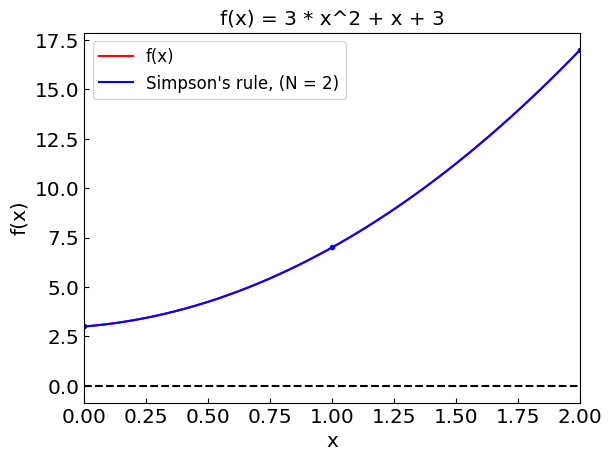


Trapezoidal rule:
N = 2 , I =  17.0
N = 4 , I =  16.25
N = 6 , I =  16.111111111111107
N = 8 , I =  16.0625
N = 10 , I =  16.04


In [ ]:
flabelquad = 'f(x) = 3 * x^2 + x + 3'
def fquad(x):
    return 3. * x**2 + x + 3.

a = 0.
b = 2.
print("Simpson's rule:")
for n in range(2,11,2):
    print("N =",n,", I = ",simpson_rule(fquad,a,b,n))

tplot =  simpson_rule_plot(fquad,a,b,2)
tplot.title(flabelquad)
tplot.show()

print('')

print("Trapezoidal rule:")
for n in range(2,11,2):
    print("N =",n,", I = ",trapezoidal_rule(fquad,a,b,n))

Simpson's rule:
N = 2 , I =  8.0
N = 4 , I =  8.0
N = 6 , I =  7.999999999999998
N = 8 , I =  8.0
N = 10 , I =  8.0


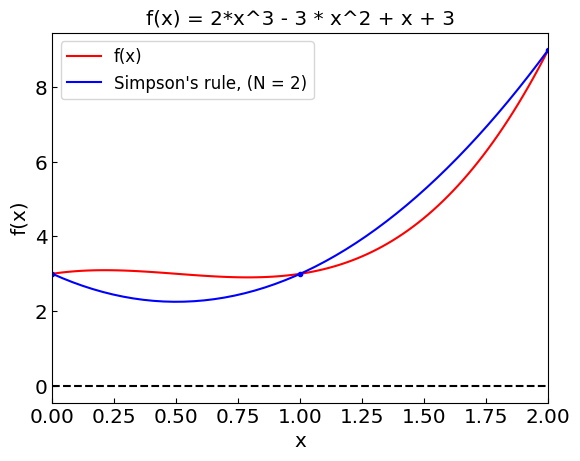


Trapezoidal rule:
N = 2 , I =  9.0
N = 4 , I =  8.25
N = 6 , I =  8.111111111111109
N = 8 , I =  8.0625
N = 10 , I =  8.04


In [ ]:
flabelcubic = 'f(x) = 2*x^3 - 3 * x^2 + x + 3'
def fcubic(x):
    return 2. * x**3 - 3. * x**2 + x + 3.

a = 0.
b = 2.
print("Simpson's rule:")
for n in range(2,11,2):
    print("N =",n,", I = ",simpson_rule(fcubic,a,b,n))

tplot =  simpson_rule_plot(fcubic,a,b,2)
tplot.title(flabelcubic)
tplot.show()

print('')

print("Trapezoidal rule:")
for n in range(2,11,2):
    print("N =",n,", I = ",trapezoidal_rule(fcubic,a,b,n))

# (Optional) Adaptive methods

We would like to control the error of numerical integration

For rectangle/trapezoidal method we know that the error scales with $h$ as $\varepsilon = c h^2$.

Let us double the number of steps. We have $h_2 = h_1 / 2$.
Then, $\varepsilon_2 = I - I_2 = c h_2^2$, and $\varepsilon_1 = I - I_1 = 4 c h_2^2$.
Therefore, $\varepsilon_2 \simeq (I_2 - I_1) / 3$.

More generally,
$$
\varepsilon_k \simeq (I_k - I_{k-1}) / 3.
$$

We can continue to double the number of subintervals until the desired precision is reached.


In [ ]:
# Trapezoidal rule for numerical integration with adaptive step
def rectangle_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = rectangle_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = rectangle_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew

    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using adaptive rectangle rule")
rectangle_rule_adaptive(f,a,b)

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using adaptive rectangle rule
Iteration:     1, I =    2.000000000000000
Iteration:     2, I =    5.125000000000000, error estimate = 1.041666666666667
Iteration:     3, I =    6.070312500000000, error estimate = 0.315104166666667
Iteration:     4, I =    6.316894531250000, error estimate = 0.082194010416667
Iteration:     5, I =    6.379180908203125, error estimate = 0.020762125651042
Iteration:     6, I =    6.394792556762695, error estimate = 0.005203882853190
Iteration:     7, I =    6.398697972297668, error estimate = 0.001301805178324
Iteration:     8, I =    6.399674482643604, error estimate = 0.000325503448645
Iteration:     9, I =    6.399918620008975, error estimate = 0.000081379121790
Iteration:    10, I =    6.399979654961498, error estimate = 0.000020344984174
Iteration:    11, I =    6.399994913737828, error estimate = 0.000005086258777
Iteration:    12, I =    6.399998728434201, error estimate = 0.000

6.399999995032923

In [ ]:
# Trapezoidal rule for numerical integration with adaptive step
def trapezoidal_rule_adaptive(f, a, b, nst = 1, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = trapezoidal_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = trapezoidal_rule(f, a, b, n)
        ek = (Inew - Iprev) / 3.
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew

    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using adaptive trapezoidal rule")
trapezoidal_rule_adaptive(f,a,b)

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using adaptive trapezoidal rule
Iteration:     1, I =   16.000000000000000
Iteration:     2, I =    9.000000000000000, error estimate = -2.333333333333333
Iteration:     3, I =    7.062500000000000, error estimate = -0.645833333333333
Iteration:     4, I =    6.566406250000000, error estimate = -0.165364583333333
Iteration:     5, I =    6.441650390625000, error estimate = -0.041585286458333
Iteration:     6, I =    6.410415649414062, error estimate = -0.010411580403646
Iteration:     7, I =    6.402604103088379, error estimate = -0.002603848775228
Iteration:     8, I =    6.400651037693024, error estimate = -0.000651021798452
Iteration:     9, I =    6.400162760168314, error estimate = -0.000162759174903
Iteration:    10, I =    6.400040690088645, error estimate = -0.000040690026556
Iteration:    11, I =    6.400010172525072, error estimate = -0.000010172521191
Iteration:    12, I =    6.400002543131352, error esti

6.400000009934106

In [ ]:
# Simpson's rule for numerical integration with adaptive step
def simpson_rule_adaptive(f, a, b, nst = 2, tol = 1.e-8, max_iterations = 16):
    Iprev = 0.
    n = nst
    Iprev = simpson_rule(f, a, b, n)
    print("Iteration: {0:5}, I = {1:20.15f}".format(1, Iprev))
    for k in range(1, max_iterations):
        n *= 2
        Inew = simpson_rule(f, a, b, n)
        ek = (Inew - Iprev) / 15.

        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(k+1, Inew, ek))
        if (abs(ek) < tol):
            return Inew
        Iprev = Inew

    print("Failed to achieve the desired accuracy after", max_iterations,"iterations")
    return Inew

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using adaptive Simpson's rule")
simpson_rule_adaptive(f,a,b,2)

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using adaptive Simpson's rule
Iteration:     1, I =    6.666666666666666
Iteration:     2, I =    6.416666666666666, error estimate = -0.016666666666667
Iteration:     3, I =    6.401041666666666, error estimate = -0.001041666666667
Iteration:     4, I =    6.400065104166666, error estimate = -0.000065104166667
Iteration:     5, I =    6.400004069010416, error estimate = -0.000004069010417
Iteration:     6, I =    6.400000254313150, error estimate = -0.000000254313151
Iteration:     7, I =    6.400000015894571, error estimate = -0.000000015894572
Iteration:     8, I =    6.400000000993410, error estimate = -0.000000000993411


6.40000000099341

In [ ]:
rungelabel = "Runge function"
def runge(x):
    return 1./(25*x**2 + 1.)

In [ ]:
a = -2.
b = 2.
print("Computing the integral of",rungelabel, "over the interval (",a,",",b,") using adaptive trapezoidal rule")
trapezoidal_rule_adaptive(runge,a,b,4,1.e-10)

Computing the integral of Runge function over the interval ( -2.0 , 2.0 ) using adaptive trapezoidal rule
Iteration:     1, I =    1.086824067022087
Iteration:     2, I =    0.698810316902099, error estimate = -0.129337916706663
Iteration:     3, I =    0.596649043819530, error estimate = -0.034053757694190
Iteration:     4, I =    0.588479663841841, error estimate = -0.002723126659230
Iteration:     5, I =    0.588444691123849, error estimate = -0.000011657572664
Iteration:     6, I =    0.588449474263155, error estimate = 0.000001594379768
Iteration:     7, I =    0.588450670842736, error estimate = 0.000000398859860
Iteration:     8, I =    0.588450970000918, error estimate = 0.000000099719394
Iteration:     9, I =    0.588451044791294, error estimate = 0.000000024930125
Iteration:    10, I =    0.588451063488940, error estimate = 0.000000006232549
Iteration:    11, I =    0.588451068163354, error estimate = 0.000000001558138
Iteration:    12, I =    0.588451069331961, error estimat

0.588451069624111

In [ ]:
a = -2.
b = 2.
print("Computing the integral of",rungelabel, "over the interval (",a,",",b,") using adaptive trapezoidal rule")
simpson_rule_adaptive(runge,a,b,4,1.e-10)

Computing the integral of Runge function over the interval ( -2.0 , 2.0 ) using adaptive trapezoidal rule
Iteration:     1, I =    0.775831429296776
Iteration:     2, I =    0.569472400195436, error estimate = -0.013757268606756
Iteration:     3, I =    0.562595286125340, error estimate = -0.000458474271340
Iteration:     4, I =    0.585756537182612, error estimate = 0.001544083403818
Iteration:     5, I =    0.588433033551185, error estimate = 0.000178433091238
Iteration:     6, I =    0.588451068642924, error estimate = 0.000001202339449
Iteration:     7, I =    0.588451069702595, error estimate = 0.000000000070645


0.5884510697025954

## Romberg method

Romberg method is a generalization of the above procedure to cancel higher orders in the error

We estimated the $\mathcal{O}(h^2)$ error in the k$th$ step of the trapezoidal method as
$$
I - I_k = \frac{I_k - I_{k-1}}{3} + \mathcal{O}(h^4).
$$

The integral can therefore be estimated to $\mathcal{O}(h^4)$ order as
$$
I = I_k + \frac{I_k - I_{k-1}}{3} + \mathcal{O}(h^4),
$$
which is in fact nothing else but the Simpson rule.

We can denote $R_{k,0} = I_k$ and $R_{k,1} = R_{k,0} + \frac{R_{k,0} - R_{k-1,0}}{3}$.
As seen above
$$
I = R_{k,1} + \mathcal{O}(h^4).
$$

Repeating this process to eliminate the $\mathcal{O}(h^4)$ we get a higher-order estimate
$$
R_{k,2} = R_{k,1} + \frac{R_{k,1} - R_{k-1,1}}{15}
$$
which accurate to order $\mathcal{O}(h^6)$.

The general formula for an estimate of order $m+1$ reads
$$
R_{k,m+1} = R_{k,m} + \frac{R_{k,m} - R_{k-1,m}}{4^{m} - 1}~.
$$

In [ ]:
def romberg(
    f,
    a,
    b,
    accuracy=1e-8,
    max_order=10
):
    R = np.zeros((max_order, max_order))
    h = (b - a) / 2.
    R[0, 0] = h * (f(a) + f(b)) # The initial trapezoidal rule
    for n in range(1, max_order):
        trapezoid = 0.0
        for j in range(2**(n-1)):
            trapezoid += f(a + (2*j+1)*h)
        R[n, 0] = 0.5 * R[n-1, 0] + h * trapezoid # The trapezoidal rule
        l = 1
        # The Romberg iterations
        for m in range(1, n+1):
            l *= 4
            R[n, m] = (l * R[n, m-1] - R[n-1, m-1]) / (l-1)
        print("Iteration: {0:5}, I = {1:20.15f}, error estimate = {2:10.15f}".format(n, R[n, m], abs(R[n, m] - R[n-1, m-1])))
        if abs(R[n, m] - R[n-1, m-1]) < accuracy:
            return R[n, m]
        h /= 2.
    print("Romberg method did not converge to required accuracy")
    return R[-1, -1]

In [ ]:
a = flimit_a
b = flimit_b
print("Computing the integral of",flabel, "over the interval (",a,",",b,") using Romberg method")
romberg(f,a,b,1e-6,18)

Computing the integral of x^4 - 2x + 2 over the interval ( 0.0 , 2.0 ) using Romberg method
Iteration:     1, I =    6.666666666666667, error estimate = 9.333333333333332
Iteration:     2, I =    6.400000000000000, error estimate = 0.266666666666667
Iteration:     3, I =    6.400000000000000, error estimate = 0.000000000000000


6.4

In [ ]:
a = -2.
b = 2.
print("Computing the integral of",rungelabel, "over the interval (",a,",",b,") using Romberg method")
romberg(runge,a,b,1e-6,18)

Computing the integral of Runge function over the interval ( -2.0 , 2.0 ) using Romberg method
Iteration:     1, I =    2.679867986798680, error estimate = 2.640264026402640
Iteration:     2, I =    0.648895658796649, error estimate = 2.030972328002031
Iteration:     3, I =    0.554236075601252, error estimate = 0.094659583195396
Iteration:     4, I =    0.562270126297315, error estimate = 0.008034050696062
Iteration:     5, I =    0.587824850153293, error estimate = 0.025554723855978
Iteration:     6, I =    0.588636945021199, error estimate = 0.000812094867906
Iteration:     7, I =    0.588448788195693, error estimate = 0.000188156825505
Iteration:     8, I =    0.588451058525226, error estimate = 0.000002270329532
Iteration:     9, I =    0.588451069812733, error estimate = 0.000000011287507


0.5884510698127332

# Improper integrals

Some integrals may contain peculiarities like:
- Integrable singularity (typically at endpoints)
- (Semi-)infinite integration range

## Integrable singularities
Consider
$$
\int_0^1 \frac{1}{\sqrt{x}} dx = \left. 2\sqrt{x} \right|_0^1 = 2
$$

The integrand diverges at $x = 0$, however, this singularity is integrable.

The trapezoidal and any method that makes use of function evaluation at integration endpoints will fail, however, due to division by zero.

In [ ]:
def fsing1(x):
    return 1./np.sqrt(x)

trapezoidal_rule(fsing1,0.,1.,10)

<ipython-input-33-941ae760dd08>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./np.sqrt(x)


inf

On the other hand, the rectangular rule seems to work (albeit slowly)

In [ ]:
print('Using rectangle rule to evaluate \int_0^1 1/\sqrt{x} dx')
nst = 1
rectangle_rule_adaptive(fsing1,0.,1.,1,1.e-3,20)

Using rectangle rule to evaluate \int_0^1 1/\sqrt{x} dx
Iteration:     1, I =    1.414213562373095
Iteration:     2, I =    1.577350269189626, error estimate = 0.054378902272177
Iteration:     3, I =    1.698844079579673, error estimate = 0.040497936796682
Iteration:     4, I =    1.786461001734842, error estimate = 0.029205640718390
Iteration:     5, I =    1.848856684639738, error estimate = 0.020798560968299
Iteration:     6, I =    1.893088359706383, error estimate = 0.014743891688882
Iteration:     7, I =    1.924392755699513, error estimate = 0.010434798664376
Iteration:     8, I =    1.946535279970520, error estimate = 0.007380841423669
Iteration:     9, I =    1.962194152677056, error estimate = 0.005219624235512
Iteration:    10, I =    1.973267083679453, error estimate = 0.003690977000799
Iteration:    11, I =    1.981096937261288, error estimate = 0.002609951193945
Iteration:    12, I =    1.986633507070365, error estimate = 0.001845523269692
Iteration:    13, I =    1.99054

1.993316751362098

#### Integrable singularities
Consider
$$
\int_a^\infty f(x) dx
$$

The semi-infinite range can be mapped into (0,1) range by appropriate variable transformation.
For instance, if
$$
x = a + \frac{t}{1-t},
$$
then
$dx = \frac{dt}{1-t^2}$
and
$$
\int_a^\infty f(x) dx = \int_0^1 f\left(a + \frac{t}{1-t}\right) \frac{dt}{1-t^2} = \int_0^1 g(t) dt
$$

Let us try it with
$$
\int_0^\infty e^{-x} dx = 1
$$

In [ ]:
def fexp(x):
    return np.exp(-x)

def g(t, f, a = 0.):
    return f(a + t / (1. - t)) / (1. - t)**2


In [ ]:
a = 0.
def frect(x):
    return g(x, fexp, a)

print('Using change of variable and the rectangle rule to evaluate \int_0^\infty \exp(-x) dx')
rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

Using change of variable and the rectangle rule to evaluate \int_0^\infty \exp(-x) dx
Iteration:     1, I =    1.471517764685769
Iteration:     2, I =    1.035213267452946, error estimate = -0.145434832410941
Iteration:     3, I =    0.984670579385046, error estimate = -0.016847562689300
Iteration:     4, I =    1.001784913275257, error estimate = 0.005704777963404
Iteration:     5, I =    1.000155714391028, error estimate = -0.000543066294743
Iteration:     6, I =    1.000040642390661, error estimate = -0.000038357333456
Iteration:     7, I =    1.000010172618432, error estimate = -0.000010156590743
Iteration:     8, I =    1.000002543136036, error estimate = -0.000002543160799
Iteration:     9, I =    1.000000635783161, error estimate = -0.000000635784292


1.0000006357831608

In [ ]:
# Try a > 0
a = 3.
def frect(x):
    return g(x, fexp, a)

print('Using change of variable and the rectangle rule to evaluate \int_',a,'^\infty \exp(-x) dx')
# nst = 1
# for n in range(1,6):
#     nst *= 10
#     print("N =",nst,", I = ",rectangle_rule(frect,0.,1.,nst))
rectangle_rule_adaptive(frect,0.,1.,1,1.e-6,20)

print('Expected value: exp(-a) =', np.exp(-a))

Using change of variable and the rectangle rule to evaluate \int_ 3.0 ^\infty \exp(-x) dx
Iteration:     1, I =    0.073262555554937
Iteration:     2, I =    0.051540233722000, error estimate = -0.007240773944312
Iteration:     3, I =    0.049023861455667, error estimate = -0.000838790755444
Iteration:     4, I =    0.049875933967130, error estimate = 0.000284024170487
Iteration:     5, I =    0.049794820930896, error estimate = -0.000027037678745
Iteration:     6, I =    0.049789091833346, error estimate = -0.000001909699183
Iteration:     7, I =    0.049787574832713, error estimate = -0.000000505666878
Expected value: exp(-a) = 0.049787068367863944


For an infinite interval
$$
\int_{-\infty}^\infty f(x) dx
$$

one option is
$$
x = \frac{t}{1-t^2}
$$
giving
$dx = \frac{1+t^2}{(1-t^2)^2} dt$
and
$$
\int_{-\infty}^\infty f(x) dx =
\int_{-1}^1 f\left(\frac{t}{1-t^2}\right) \frac{1+t^2}{(1-t^2)^2} dt = \int_{-1}^1 g(t) dt
$$

Let us try it with
$$
\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi} = 1.772454\ldots
$$

In [ ]:
def fexp2(x):
    return np.exp(-x**2)

def g2(t, f):
    return f(t / (1. - t**2)) * (1.+t**2) / (1. - t**2)**2


In [ ]:
def frect2(x):
    return g2(x, fexp2)

print('Using change of variable and the rectangle rule to evaluate \int_{-\infty}^\infty \exp(-x^2) dx')
rectangle_rule_adaptive(frect2,-1.,1.,1,1.e-6,20)

print('Expected value: \sqrt{\pi} =', np.sqrt(np.pi))

Using change of variable and the rectangle rule to evaluate \int_{-\infty}^\infty \exp(-x^2) dx
Iteration:     1, I =    2.000000000000000
Iteration:     2, I =    2.849690615244243, error estimate = 0.283230205081414
Iteration:     3, I =    1.557994553948652, error estimate = -0.430565353765197
Iteration:     4, I =    1.808005109208286, error estimate = 0.083336851753211
Iteration:     5, I =    1.770118560572371, error estimate = -0.012628849545305
Iteration:     6, I =    1.772492101507391, error estimate = 0.000791180311673
Iteration:     7, I =    1.772453880915058, error estimate = -0.000012740197444
Iteration:     8, I =    1.772453850905505, error estimate = -0.000000010003185
Expected value: \sqrt{\pi} = 1.7724538509055159
